# 1. Transforms用途

① Transforms当成工具箱的话，里面的class就是不同的工具。例如像totensor、resize这些工具。

② Transforms拿一些特定格式的图片，经过Transforms里面的工具，获得我们想要的结果。

# 2. Transforms该如何使用

## 2.1 transforms.Totensor使用

In [1]:
from torchvision import transforms
from PIL import Image

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)  

tensor_trans = transforms.ToTensor()  # 创建 transforms.ToTensor类 的实例化对象
tensor_img = tensor_trans(img)  # 调用 transforms.ToTensor类 的__call__的魔术方法   
print(tensor_img)

tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5686, 0.5686, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         ...,
         [0.5490, 0.5647, 0.5725,  ..., 0.6314, 0.6235, 0.6118],
         [0.5608, 0.5765, 0.5843,  ..., 0.5961, 0.5843, 0.5765],
         [0.5725, 0.5843, 0.5922,  ..., 0.5647, 0.5529, 0.5490]],

        [[0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4431, 0.4431, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         ...,
         [0.4000, 0.4157, 0.4235,  ..., 0.4706, 0.4627, 0.4510],
         [0.4118, 0.4275, 0.4353,  ..., 0.4431, 0.4314, 0.4235],
         [0.4235, 0.4353, 0.4431,  ..., 0.4118, 0.4000, 0.3961]],

        [[0.2471, 0.2471, 0.2471,  ..., 0.2588, 0.2627, 0.2667],
         [0.2471, 0.2471, 0.2471,  ..., 0.2588, 0.2627, 0.2667],
         [0.2431, 0.2431, 0.2471,  ..., 0.2588, 0.2627, 0.

## 2.2 需要Tensor数据类型原因

① Tensor有一些属性，比如反向传播、梯度等属性，它包装了神经网络需要的一些属性。

In [2]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)

writer = SummaryWriter("logs") 

tensor_trans = transforms.ToTensor() 
tensor_img = tensor_trans(img)  

writer.add_image("Temsor_img",tensor_img) 
writer.close()

② 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

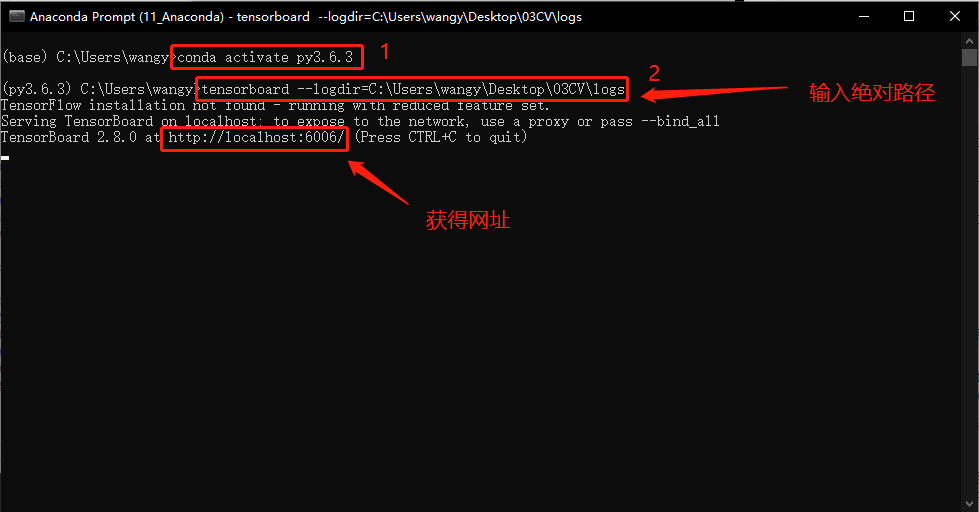

③ 输入网址可得Tensorboard界面。

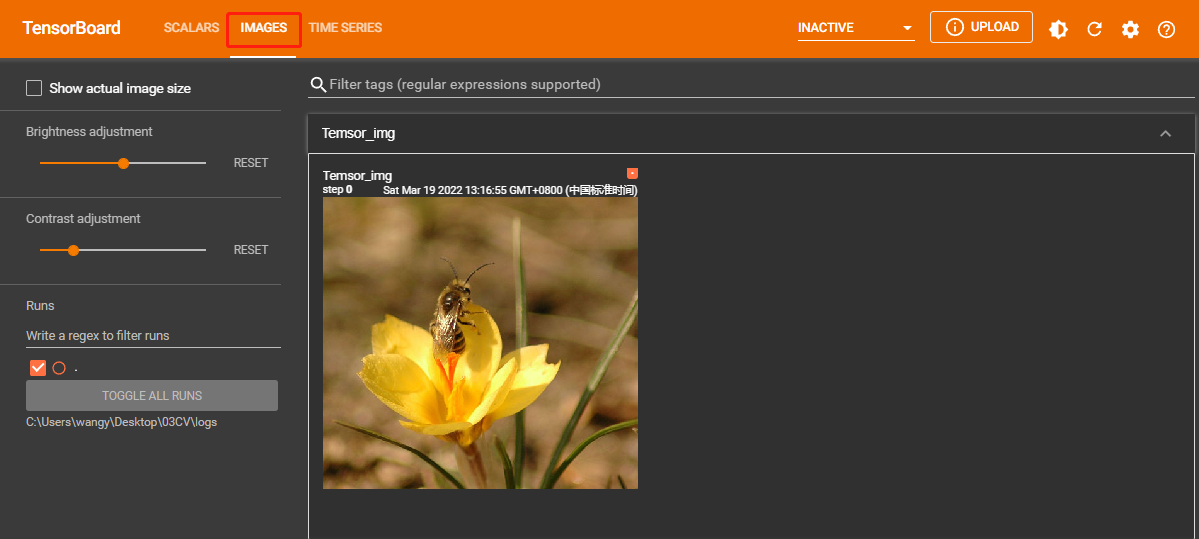

# 3. 常见的Transforms工具

① Transforms的工具主要关注他的输入、输出、作用。

## 3.1 \_\_call__魔术方法使用

In [3]:
class Person:
    def __call__(self,name):
        print("__call__ "+"Hello "+name)
        
    def hello(self,name):
        print("hello "+name)
        
person = Person()  # 实例化对象
person("zhangsan") # 调用__call__魔术方法
person.hello("list") # 调用hello方法

__call__ Hello zhangsan
hello list


## 3.2 Normanize归一化

In [4]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)

writer = SummaryWriter("logs") 


tensor_trans = transforms.ToTensor() 
img_tensor = tensor_trans(img)  

print(img_tensor[0][0][0])
tensor_norm = transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]) #input[channel]=(input[chnnel]-mean[channel])/std[channel]            
img_norm = tensor_norm(img_tensor)  
print(img_norm[0][0][0])

writer.add_image("img_tensor",img_tensor) 
writer.add_image("img_norm",img_norm) 
writer.close()

tensor(0.5725)
tensor(0.1451)


## 3.3 Resize裁剪

### 3.3.1 Resize裁剪方法一

In [5]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)
print(img)  # PIL类型的图片原始比例为 500×464

writer = SummaryWriter("logs") 

trans_totensor = transforms.ToTensor() 
img_tensor = trans_totensor(img)  

trans_resize = transforms.Resize((512,512))
# PIL数据类型的 img -> resize -> PIL数据类型的 img_resize
img_resize = trans_resize(img)
# PIL 数据类型的 PIL -> totensor -> img_resize tensor
img_resize = trans_totensor(img_resize)
print(img_resize.size()) # PIL类型的图片原始比例为 3×512×512，3通道

writer.add_image("img_tensor",img_tensor) 
writer.add_image("img_resize",img_resize) 
writer.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x2C25DF0B320>
torch.Size([3, 512, 512])


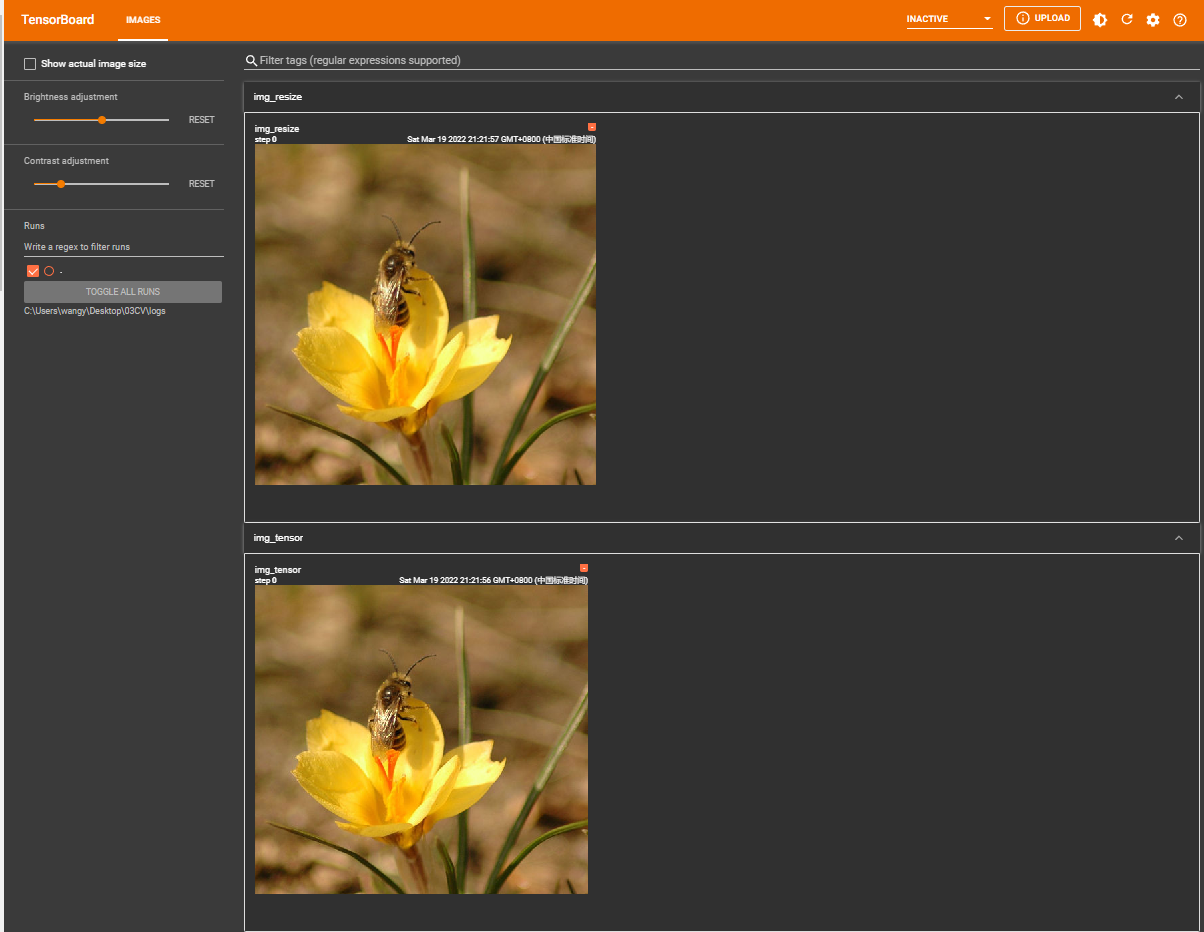

### 3.3.2 Resize裁剪方法二

In [6]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)
print(img)

writer = SummaryWriter("logs") 

tensor_trans = transforms.ToTensor() 
img_tensor = tensor_trans(img)  

# Resize 第二种方式：等比缩放
trans_resize_2 = transforms.Resize(512) # 512/464 = 1.103 551/500 = 1.102
# PIL类型的 Image -> resize -> PIL类型的 Image -> totensor -> tensor类型的 Image
trans_compose = transforms.Compose([trans_resize_2, trans_totensor]) # Compose函数中后面一个参数的输入为前面一个参数的输出   
img_resize_2 = trans_compose(img)
print(img_resize_2.size()) 
writer.add_image("img_tensor",img_tensor) 
writer.add_image("img_resize_2",img_resize_2) 
writer.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x2C25DF0B6D8>
torch.Size([3, 512, 551])


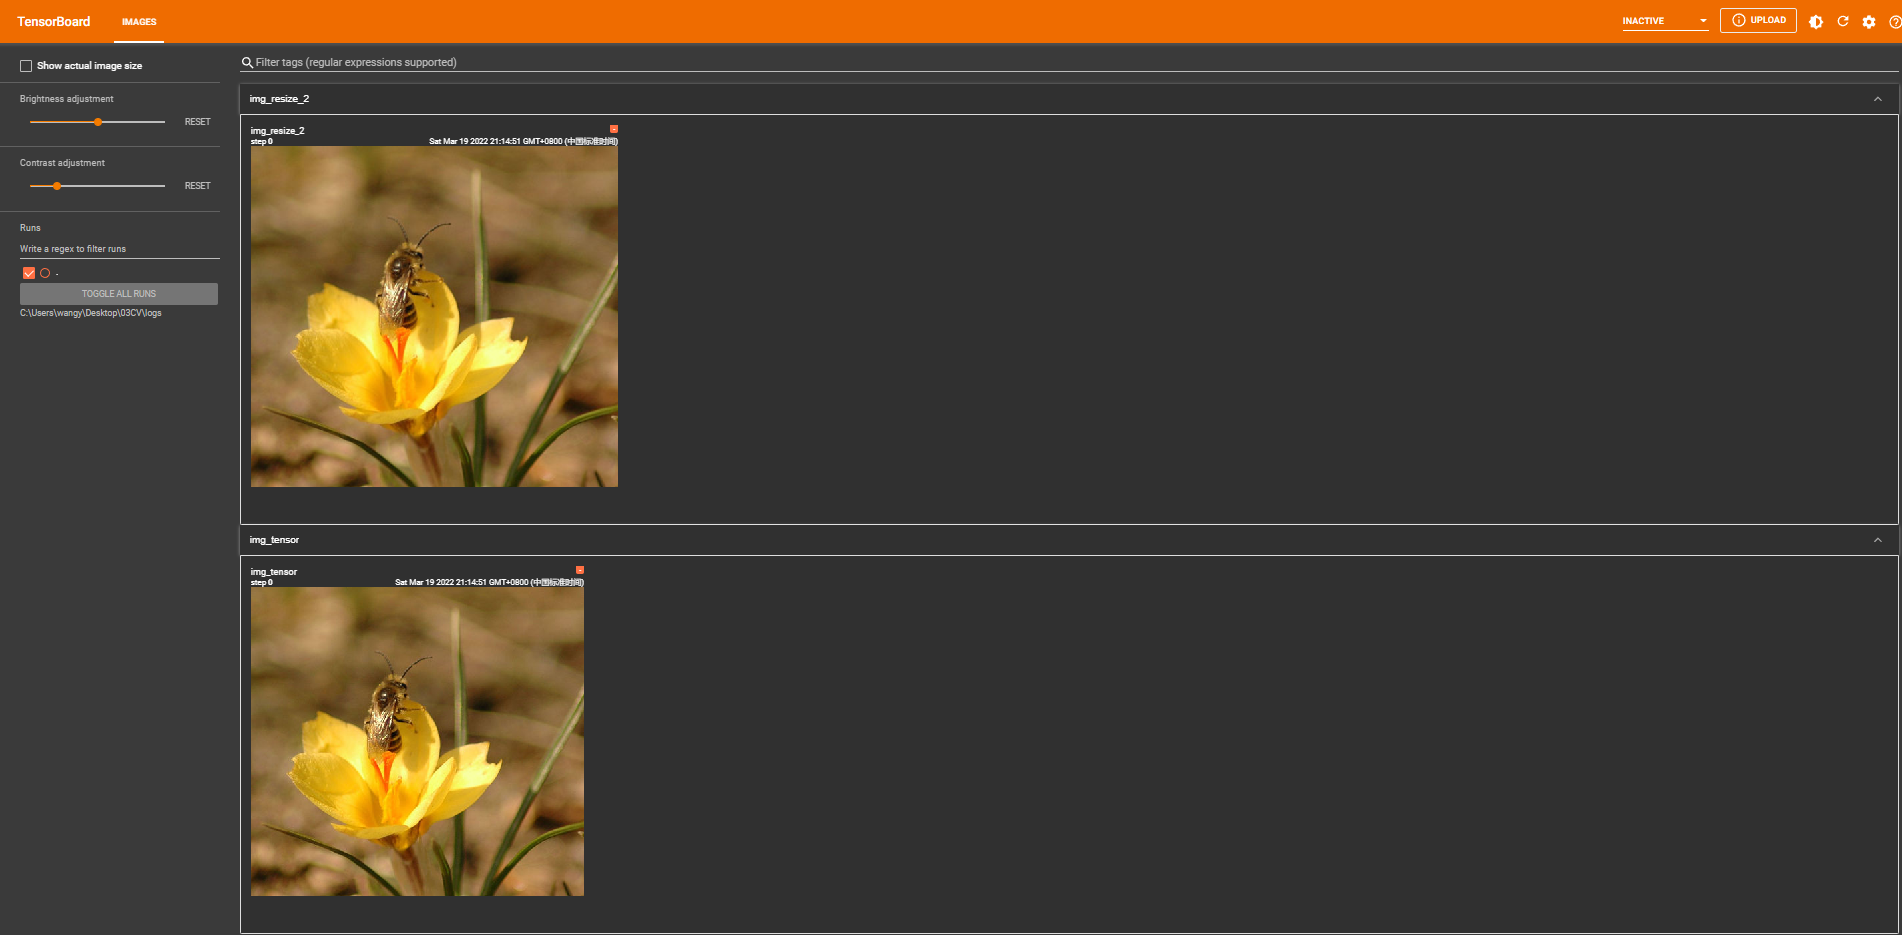

## 3.4 RandomCrop随即裁剪

### 3.4.1 RandomCrop随即裁剪方式一

In [7]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)
print(img)

writer = SummaryWriter("logs") 

tensor_trans = transforms.ToTensor() 
img_tensor = tensor_trans(img)  
writer.add_image("img_tensor",img_tensor) 

trans_random = transforms.RandomCrop(312) # 随即裁剪成 312×312 的
trans_compose_2 = transforms.Compose([trans_random,tensor_trans])
for i in range(10):
    img_crop = trans_compose_2(img)
    writer.add_image("RandomCrop",img_crop,i) 
    print(img_crop.size()) 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x2C25DF0BAC8>
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])
torch.Size([3, 312, 312])


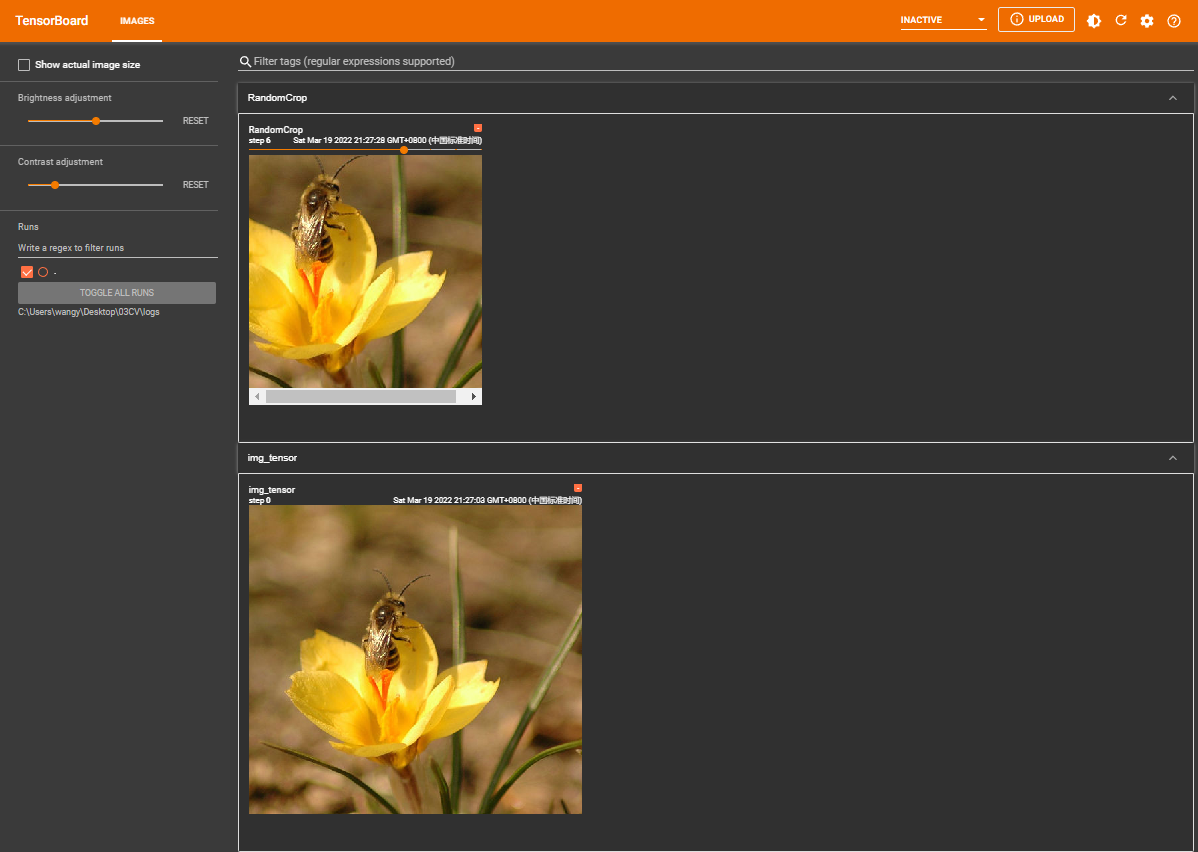

### 3.4.2 RandomCrop随即裁剪方式二

In [8]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

img_path = "Data/FirstTypeData/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)

print(img)

writer = SummaryWriter("logs") 

tensor_trans = transforms.ToTensor() 
img_tensor = tensor_trans(img)  
writer.add_image("img_tensor",img_tensor) 

trans_random = transforms.RandomCrop((312,100))  # 指定随即裁剪的宽和高       
trans_compose_2 = transforms.Compose([trans_random,tensor_trans])
for i in range(10):
    img_crop = trans_compose_2(img)
    writer.add_image("RandomCrop",img_crop,i) 
    print(img_crop.size()) 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x2C25DF1B390>
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])
torch.Size([3, 312, 100])


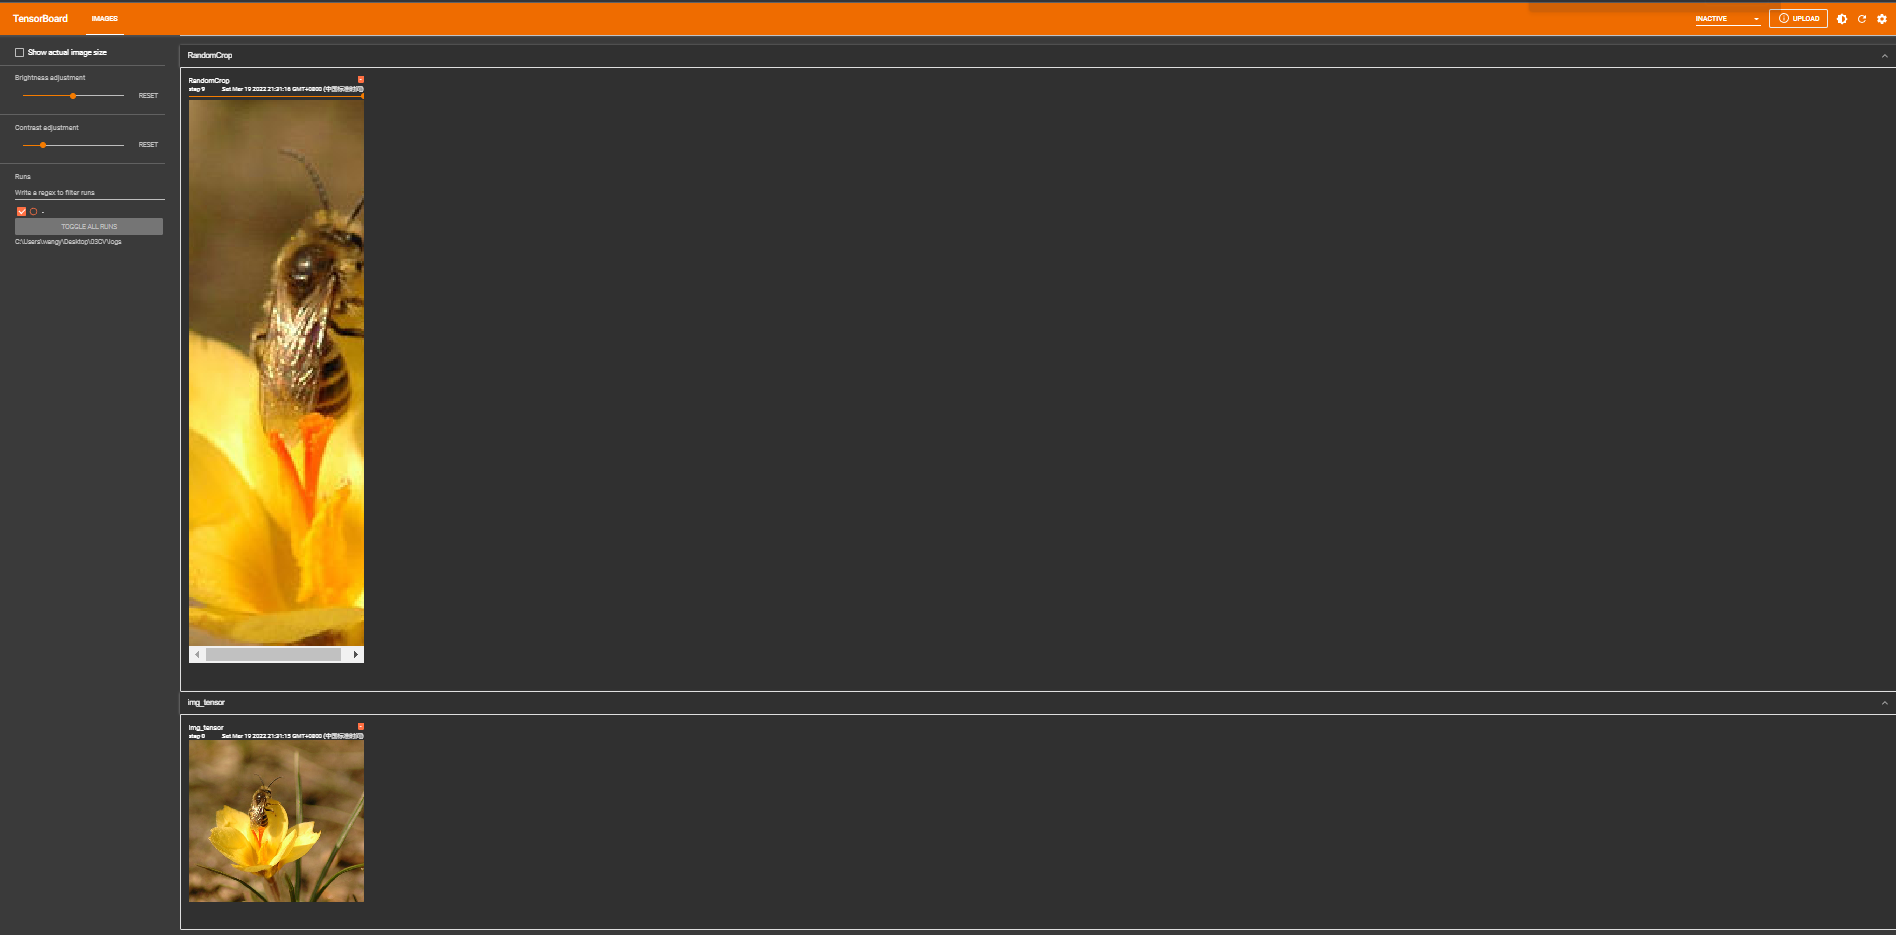